In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os



pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)


LISTINGS_FILE = 'listings.csv'
CALENDAR_FILE = 'calendar.csv'
REVIEWS_FILE = 'reviews.csv'
USERS_FILE = 'users.csv'
SESSIONS_FILE = 'sessions.csv'

print("Libraries imported and configuration set.")

Libraries imported and configuration set.


In [14]:

print(f"\n--- Loading and Summarizing: Listings ({LISTINGS_FILE}) ---")
try:
    df_listings = pd.read_csv(LISTINGS_FILE)
    print(f"\nShape: {df_listings.shape}")
    print("\nInfo:")
    df_listings.info(verbose=True, show_counts=True)
    print("\nHead:")
    display(df_listings.head())
    print(f"--- End Summary: Listings ---")
except FileNotFoundError:
    print(f"Error: File not found at {LISTINGS_FILE}")
except Exception as e:
    print(f"Error loading {LISTINGS_FILE}: {e}")


--- Loading and Summarizing: Listings (listings.csv) ---

Shape: (28543, 75)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28543 entries, 0 to 28542
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19994 non-null  float64
 1   listing_url                                   19965 non-null  object 
 2   scrape_id                                     20092 non-null  float64
 3   last_scraped                                  19976 non-null  object 
 4   source                                        19876 non-null  object 
 5   name                                          20019 non-null  object 
 6   description                                   19180 non-null  object 
 7   neighborhood_overview                         9194 non-null   object 
 8   picture_url                                   19912

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.897406e+07,https://www.nocarz.pl/rooms/18974065,2.024121e+13,NaN,NaN,Charming split-level one bedroom flat,Large living room with open-plan kitchen. With...,NaN,https://a0.muscache.com/pictures/866de5f0-05a7...,NaN,https://www.nocarz.pl/users/show/5249313,NaN,NaN,"London, United Kingdom","Hi,\r\nI'm French but grew up in London, where...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/5249313/profi...,https://a0.muscache.com/im/users/5249313/profi...,Lewisham,NaN,1.0,NaN,t,NaN,NaN,Lewisham,NaN,51.454570,NaN,Entire rental unit,Entire home/apt,4.0,NaN,NaN,1.0,1.0,"[""Cooking basics"", ""Breakfast"", ""Stove"", ""Hair...",$85.00,3.0,30.0,3.0,3.0,30.0,30.0,NaN,30.0,NaN,t,NaN,39.0,69.0,159.0,2024-12-11,19.0,0.0,0.0,2017-07-17,NaN,4.79,5.0,4.63,NaN,5.0,4.63,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN
1,1.074536e+18,https://www.nocarz.pl/rooms/1074535877676155362,NaN,NaN,NaN,Stunning two bed apartment,NaN,NaN,NaN,NaN,https://www.nocarz.pl/users/show/90831525,Mirjana,NaN,"London, United Kingdom",I am busy professional with lot of internation...,NaN,100%,67%,t,NaN,NaN,NaN,3.0,NaN,NaN,NaN,t,NaN,Haringey,NaN,51.609998,-0.133125,NaN,NaN,4.0,2.0,2 baths,NaN,2.0,"[""Cooking basics"", ""Fire extinguisher"", ""Stove...",$129.00,15.0,180.0,1.0,NaN,NaN,180.0,15.0,NaN,NaN,t,23.0,53.0,83.0,NaN,2024-12-11,NaN,2.0,0.0,2024-04-12,NaN,4.50,5.0,4.50,4.5,5.0,4.50,4.00,NaN,f,3.0,NaN,2.0,NaN,0.25
2,7.963047e+17,https://www.nocarz.pl/rooms/796304692597746009,2.024121e+13,2024-12-11,city scrape,NaN,This stylish and elegant apartment consists of...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,NaN,NaN,Avtar Singh,NaN,NaN,NaN,within an hour,100%,77%,f,NaN,https://a0.muscache.com/im/pictures/user/User-...,NaN,19.0,20.0,"['email', 'phone']",t,t,NaN,Ealing,NaN,NaN,-0.374776,Entire rental unit,Entire home/apt,NaN,1.0,1 bath,1.0,1.0,NaN,$160.00,1.0,NaN,1.0,1.0,365.0,NaN,1.0,365.0,NaN,t,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,12.0,12.0,NaN,0.0,NaN
3,3.694235e+07,https://www.nocarz.pl/rooms/36942349,NaN,2024-12-12,previous scrape,One bedroom apartment beside Hackney Downs,NaN,NaN,https://a0.muscache.com/pictures/aa38cea6-f9ea...,NaN,https://www.nocarz.pl/users/show/29438574,Sinead,2015-03-16,NaN,Relaxed Irish girl who loves to travel and exp...,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/users/29438574/prof...,Stoke Newington,2.0,2.0,"['email', 'phone']",NaN,NaN,NaN,Hackney,NaN,51.553140,NaN,Entire condo,NaN,2.0,NaN,1 bath,1.0,NaN,NaN,NaN,2.0,1125.0,NaN,2.0,1125.0,NaN,NaN,1125.0,NaN,NaN,0.0,0.0,NaN,0.0,2024-12-12,7.0,NaN,NaN,2019-08-18,2020-02-16,5.00,NaN,4.86,NaN,NaN,4.71,4.86,NaN,f,1.0,1.0,0.0,0.0,NaN
4,NaN,https://www.nocarz.p

--- End Summary: Listings ---


In [15]:

print(f"\n--- Loading and Summarizing: Calendar ({CALENDAR_FILE}) ---")
try:
    df_calendar = pd.read_csv(CALENDAR_FILE)
    print(f"\nShape: {df_calendar.shape}")
    print("\nInfo:")
    df_calendar.info(verbose=True, show_counts=True)
    print("\nHead:")
    display(df_calendar.head())
    print(f"--- End Summary: Calendar ---")
except FileNotFoundError:
    print(f"Error: File not found at {CALENDAR_FILE}")
except Exception as e:
    print(f"Error loading {CALENDAR_FILE}: {e}")


--- Loading and Summarizing: Calendar (calendar.csv) ---

Shape: (10417861, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417861 entries, 0 to 10417860
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   listing_id      7291415 non-null  float64
 1   date            7294110 non-null  object 
 2   available       7293170 non-null  object 
 3   price           7292814 non-null  object 
 4   adjusted_price  1826 non-null     object 
 5   minimum_nights  7293310 non-null  float64
 6   maximum_nights  7290930 non-null  float64
dtypes: float64(3), object(4)
memory usage: 556.4+ MB

Head:


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1.990216e+07,2025-05-02,NaN,$37.00,NaN,9.0,1125.0
1,3.707577e+07,2025-11-25,f,$72.00,NaN,NaN,1125.0
2,1.091268e+18,NaN,NaN,$311.00,NaN,4.0,NaN
3,8.296219e+17,2025-12-03,t,$36.00,NaN,5.0,365.0
4,NaN,2025-09-16,f,$86.00,NaN,1.0,30.0


--- End Summary: Calendar ---


In [16]:

print(f"\n--- Loading and Summarizing: Reviews ({REVIEWS_FILE}) ---")
try:
    df_reviews = pd.read_csv(REVIEWS_FILE)
    print(f"\nShape: {df_reviews.shape}")
    print("\nInfo:")
    df_reviews.info(verbose=True, show_counts=True)
    print("\nHead:")
    display(df_reviews.head())
    print(f"--- End Summary: Reviews ---")
except FileNotFoundError:
    print(f"Error: File not found at {REVIEWS_FILE}")
except Exception as e:
    print(f"Error loading {REVIEWS_FILE}: {e}")


--- Loading and Summarizing: Reviews (reviews.csv) ---

Shape: (572190, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572190 entries, 0 to 572189
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   listing_id        400384 non-null  float64
 1   id                400847 non-null  float64
 2   date              400491 non-null  object 
 3   reviewer_id       400655 non-null  float64
 4   reviewer_name     400029 non-null  object 
 5   comments          400155 non-null  object 
 6   numerical_review  400197 non-null  float64
dtypes: float64(4), object(3)
memory usage: 30.6+ MB

Head:


,listing_id,id,date,reviewer_id,reviewer_name,comments,numerical_review
0,7.276367e+06,9.056255e+17,2023-06-03,22414746.0,NaN,L'appartamento di Molly si trova a due minuti ...,4.0
1,1.733173e+07,4.830042e+08,NaN,NaN,NaN,Awesome stylish basement apartment. Close to b...,5.0
2,1.717541e+07,NaN,NaN,124877747.0,NaN,NaN,NaN
3,6.403758e+17,7.955223e+17,NaN,242127230.0,Maureen,Oscar's flat was wonderful in an exceptional l...,5.0
4,NaN,6.469419e+17,2022-06-11,NaN,NaN,amazing location (very easy to get places) and...,5.0


--- End Summary: Reviews ---


In [17]:

print(f"\n--- Loading and Summarizing: Users ({USERS_FILE}) ---")
USERS_FILE = 'users.csv'
try:
    df_users = pd.read_csv(USERS_FILE)
    print(f"\nShape: {df_users.shape}")
    print("\nInfo:")
    df_users.info(verbose=True, show_counts=True)
    print("\nHead:")
    display(df_users.head())
    print(f"--- End Summary: Users ---")
except FileNotFoundError:
    print(f"Error: File not found at {USERS_FILE}")
except Exception as e:
    print(f"Error loading {USERS_FILE}: {e}")


--- Loading and Summarizing: Users (users.csv) ---

Shape: (532621, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532621 entries, 0 to 532620
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             372690 non-null  float64
 1   name           373148 non-null  object 
 2   surname        372867 non-null  object 
 3   city           372810 non-null  object 
 4   street         372679 non-null  object 
 5   street_number  372421 non-null  object 
 6   postal_code    372268 non-null  object 
dtypes: float64(1), object(6)
memory usage: 28.4+ MB

Head:


,id,name,surname,city,street,street_number,postal_code
0,85853036.0,NaN,NaN,Dąbrowa Górnicza,Kusocińskiego,NaN,79-194
1,39174954.0,Marika,NaN,Żary,Szczęśliwa,262,NaN
2,480916387.0,Aurelia,Pakosz,Konin,Swierkowa,10,49-354
3,136775609.0,NaN,NaN,Wałbrzych,NaN,29/87,55-593
4,NaN,Stefan,NaN,NaN,Stycznia,39,NaN


--- End Summary: Users ---


In [18]:

print(f"\n--- Loading and Summarizing: Sessions ({SESSIONS_FILE}) ---")
SESSIONS_FILE = 'sessions.csv'
try:
    df_sessions = pd.read_csv(SESSIONS_FILE)
    print(f"\nShape: {df_sessions.shape}")
    print("\nInfo:")
    df_sessions.info(verbose=True, show_counts=True)
    print("\nHead:")
    display(df_sessions.head())
    print(f"--- End Summary: Sessions ---")
except FileNotFoundError:
    print(f"Error: File not found at {SESSIONS_FILE}")
except Exception as e:
    print(f"Error loading {SESSIONS_FILE}: {e}")


--- Loading and Summarizing: Sessions (sessions.csv) ---

Shape: (7724194, 4)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7724194 entries, 0 to 7724193
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   action      5406106 non-null  object 
 1   user_id     5406986 non-null  float64
 2   timestamp   5408019 non-null  object 
 3   listing_id  5006782 non-null  float64
dtypes: float64(2), object(2)
memory usage: 235.7+ MB

Head:


,action,user_id,timestamp,listing_id
0,browse_listings,22414746.0,2024-04-17T11:16:49.474128,NaN
1,view_listing,NaN,2024-04-17T11:47:41.474128,7.747605e+17
2,view_listing,NaN,2024-04-17T12:46:25.474128,1.189723e+18
3,view_listing,22414746.0,NaN,NaN
4,NaN,22414746.0,2024-04-17T13:26:56.474128,1.037587e+18


--- End Summary: Sessions ---


In [12]:


def analyze_missing_values(df, df_name):
    """Calculates and prints the percentage of missing values for a DataFrame."""
    print(f"\n--- Missing Value Analysis: {df_name} ---")
    if df is None:
        print("DataFrame not loaded.")
        return

    total_rows = len(df)
    missing_counts = df.isnull().sum()
    missing_percentages = (missing_counts / total_rows) * 100

    missing_df = pd.DataFrame({
        'Missing Count': missing_counts,
        'Missing Percentage (%)': missing_percentages
    })


    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Percentage (%)', ascending=False)

    if missing_df.empty:
        print("No missing values found.")
    else:
        print(f"Total rows: {total_rows}")
        print(f"Columns with missing values ({len(missing_df)} out of {len(df.columns)}):")
        display(missing_df)
    print(f"--- End Missing Value Analysis: {df_name} ---")


try:
    analyze_missing_values(df_listings, 'Listings')
    analyze_missing_values(df_calendar, 'Calendar')
    analyze_missing_values(df_reviews, 'Reviews')
    analyze_missing_values(df_users, 'Users')
    analyze_missing_values(df_sessions, 'Sessions')
except NameError as e:
    print(f"Error: One of the DataFrames might not be defined. Did previous cells run correctly? {e}")


--- Missing Value Analysis: Listings ---
Total rows: 28543
Columns with missing values (75 out of 75):


,Missing Count,Missing Percentage (%)
neighbourhood_group_cleansed,28543,100.000000
license,28543,100.000000
calendar_updated,28543,100.000000
neighbourhood,19390,67.932593
neighborhood_overview,19349,67.788950
host_neighbourhood,18775,65.777949
host_about,18386,64.415093
host_response_rate,15486,54.254984
beds,15451,54.132362
host_response_time,15436,54.079809


--- End Missing Value Analysis: Listings ---

--- Missing Value Analysis: Calendar ---
Total rows: 10417861
Columns with missing values (7 out of 7):


,Missing Count,Missing Percentage (%)
adjusted_price,10416035,99.982472
maximum_nights,3126931,30.015096
listing_id,3126446,30.010441
price,3125047,29.997012
available,3124691,29.993595
minimum_nights,3124551,29.992251
date,3123751,29.984572


--- End Missing Value Analysis: Calendar ---

--- Missing Value Analysis: Reviews ---
Total rows: 572190
Columns with missing values (7 out of 7):


,Missing Count,Missing Percentage (%)
reviewer_name,172161,30.088083
comments,172035,30.066062
numerical_review,171993,30.058722
listing_id,171806,30.026040
date,171699,30.007340
reviewer_id,171535,29.978678
id,171343,29.945123


--- End Missing Value Analysis: Reviews ---

--- Missing Value Analysis: Users ---
Total rows: 532621
Columns with missing values (7 out of 7):


,Missing Count,Missing Percentage (%)
postal_code,160353,30.106398
street_number,160200,30.077672
street,159942,30.029233
id,159931,30.027168
city,159811,30.004637
surname,159754,29.993936
name,159473,29.941178


--- End Missing Value Analysis: Users ---

--- Missing Value Analysis: Sessions ---
Total rows: 7724194
Columns with missing values (4 out of 4):


,Missing Count,Missing Percentage (%)
listing_id,2717412,35.180525
action,2318088,30.010743
user_id,2317208,29.999350
timestamp,2316175,29.985977


--- End Missing Value Analysis: Sessions ---



--- Plotting: Listings per Neighbourhood ---


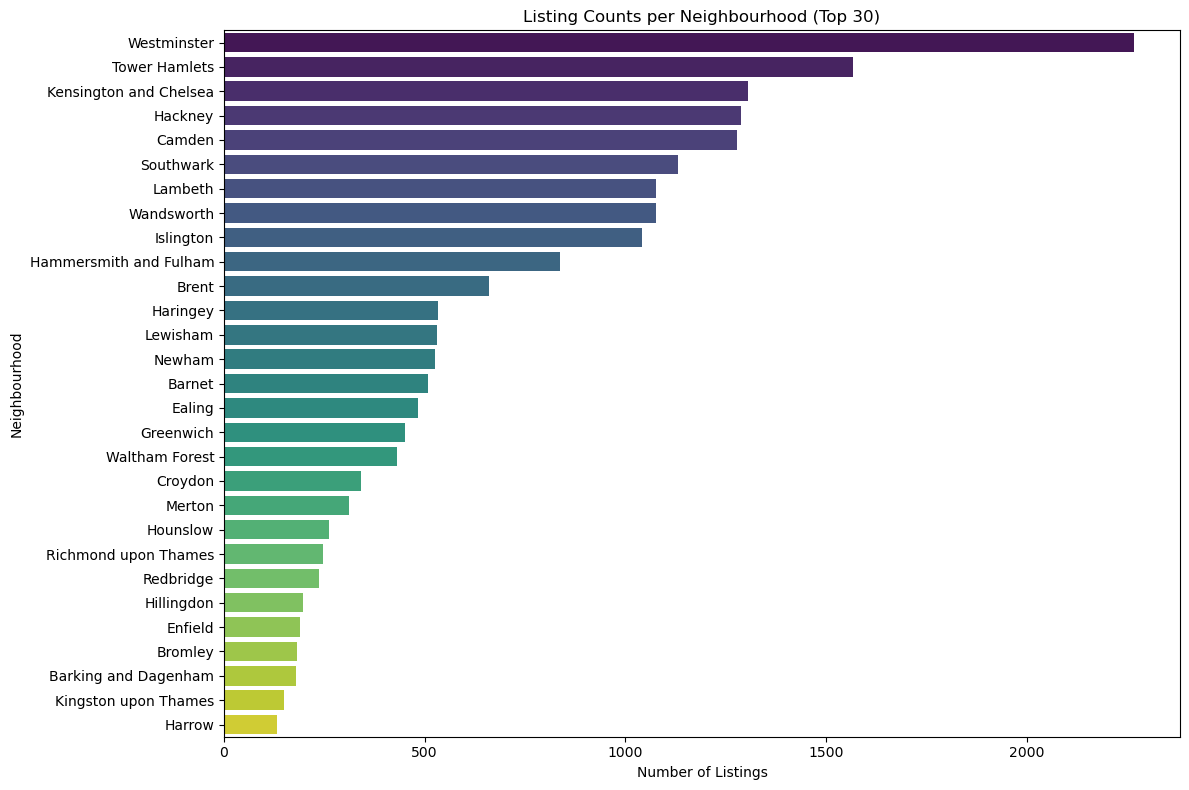

--- End Plotting: Listings per Neighbourhood ---


In [19]:


print("\n--- Plotting: Listings per Neighbourhood ---")
plt.figure(figsize=(12, 8))


if 'df_listings' in locals() and 'neighbourhood_cleansed' in df_listings.columns:

    neighbourhood_counts = df_listings['neighbourhood_cleansed'].value_counts(dropna=False)


    top_n = 30
    if len(neighbourhood_counts) > top_n:
        neighbourhood_counts = neighbourhood_counts.head(top_n)
        plot_title = f'Listing Counts per Neighbourhood (Top {top_n})'
    else:
        plot_title = 'Listing Counts per Neighbourhood'

    sns.barplot(y=neighbourhood_counts.index, x=neighbourhood_counts.values, palette='viridis', orient='h')
    plt.title(plot_title)
    plt.xlabel('Number of Listings')
    plt.ylabel('Neighbourhood')
    plt.tight_layout()
    plt.show()
else:
    print("df_listings or neighbourhood_cleansed column not found. Please run previous cells.")

print("--- End Plotting: Listings per Neighbourhood ---")


--- Plotting: Listings per Room Type ---


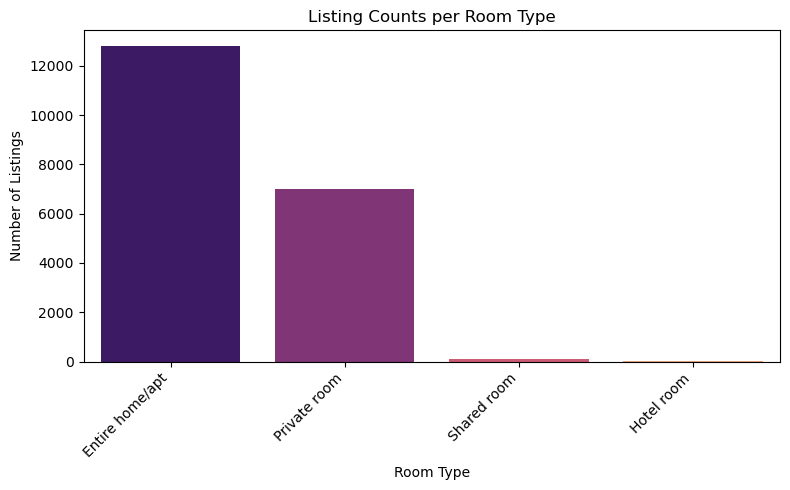

--- End Plotting: Listings per Room Type ---


In [20]:


print("\n--- Plotting: Listings per Room Type ---")
plt.figure(figsize=(8, 5))


if 'df_listings' in locals() and 'room_type' in df_listings.columns:
    room_type_counts = df_listings['room_type'].value_counts(dropna=False)

    sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='magma')
    plt.title('Listing Counts per Room Type')
    plt.xlabel('Room Type')
    plt.ylabel('Number of Listings')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("df_listings or room_type column not found. Please run previous cells.")

print("--- End Plotting: Listings per Room Type ---")


--- Plotting: Listings per Property Type ---


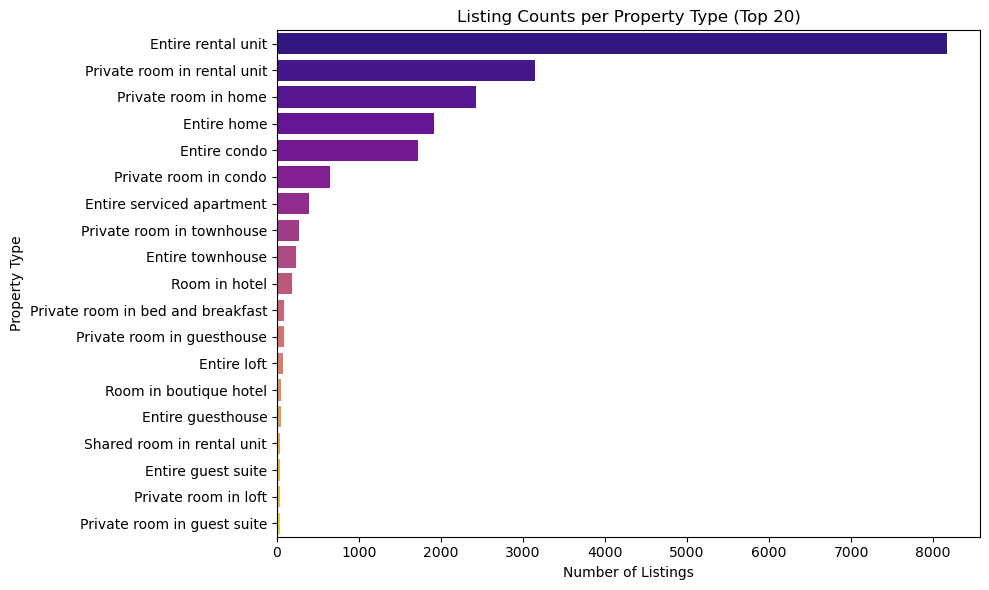

--- End Plotting: Listings per Property Type ---


In [21]:


print("\n--- Plotting: Listings per Property Type ---")
plt.figure(figsize=(10, 6))


if 'df_listings' in locals() and 'property_type' in df_listings.columns:
    property_type_counts = df_listings['property_type'].value_counts(dropna=False)


    top_n = 20
    if len(property_type_counts) > top_n:
        property_type_counts = property_type_counts.head(top_n)
        plot_title = f'Listing Counts per Property Type (Top {top_n})'
    else:
        plot_title = 'Listing Counts per Property Type'

    sns.barplot(y=property_type_counts.index, x=property_type_counts.values, palette='plasma', orient='h')
    plt.title(plot_title)
    plt.xlabel('Number of Listings')
    plt.ylabel('Property Type')
    plt.tight_layout()
    plt.show()
else:
    print("df_listings or property_type column not found. Please run previous cells.")

print("--- End Plotting: Listings per Property Type ---")


--- Visualizing Missing Data: Listings ---

Missingness Heatmap (Shows correlation of nullity):


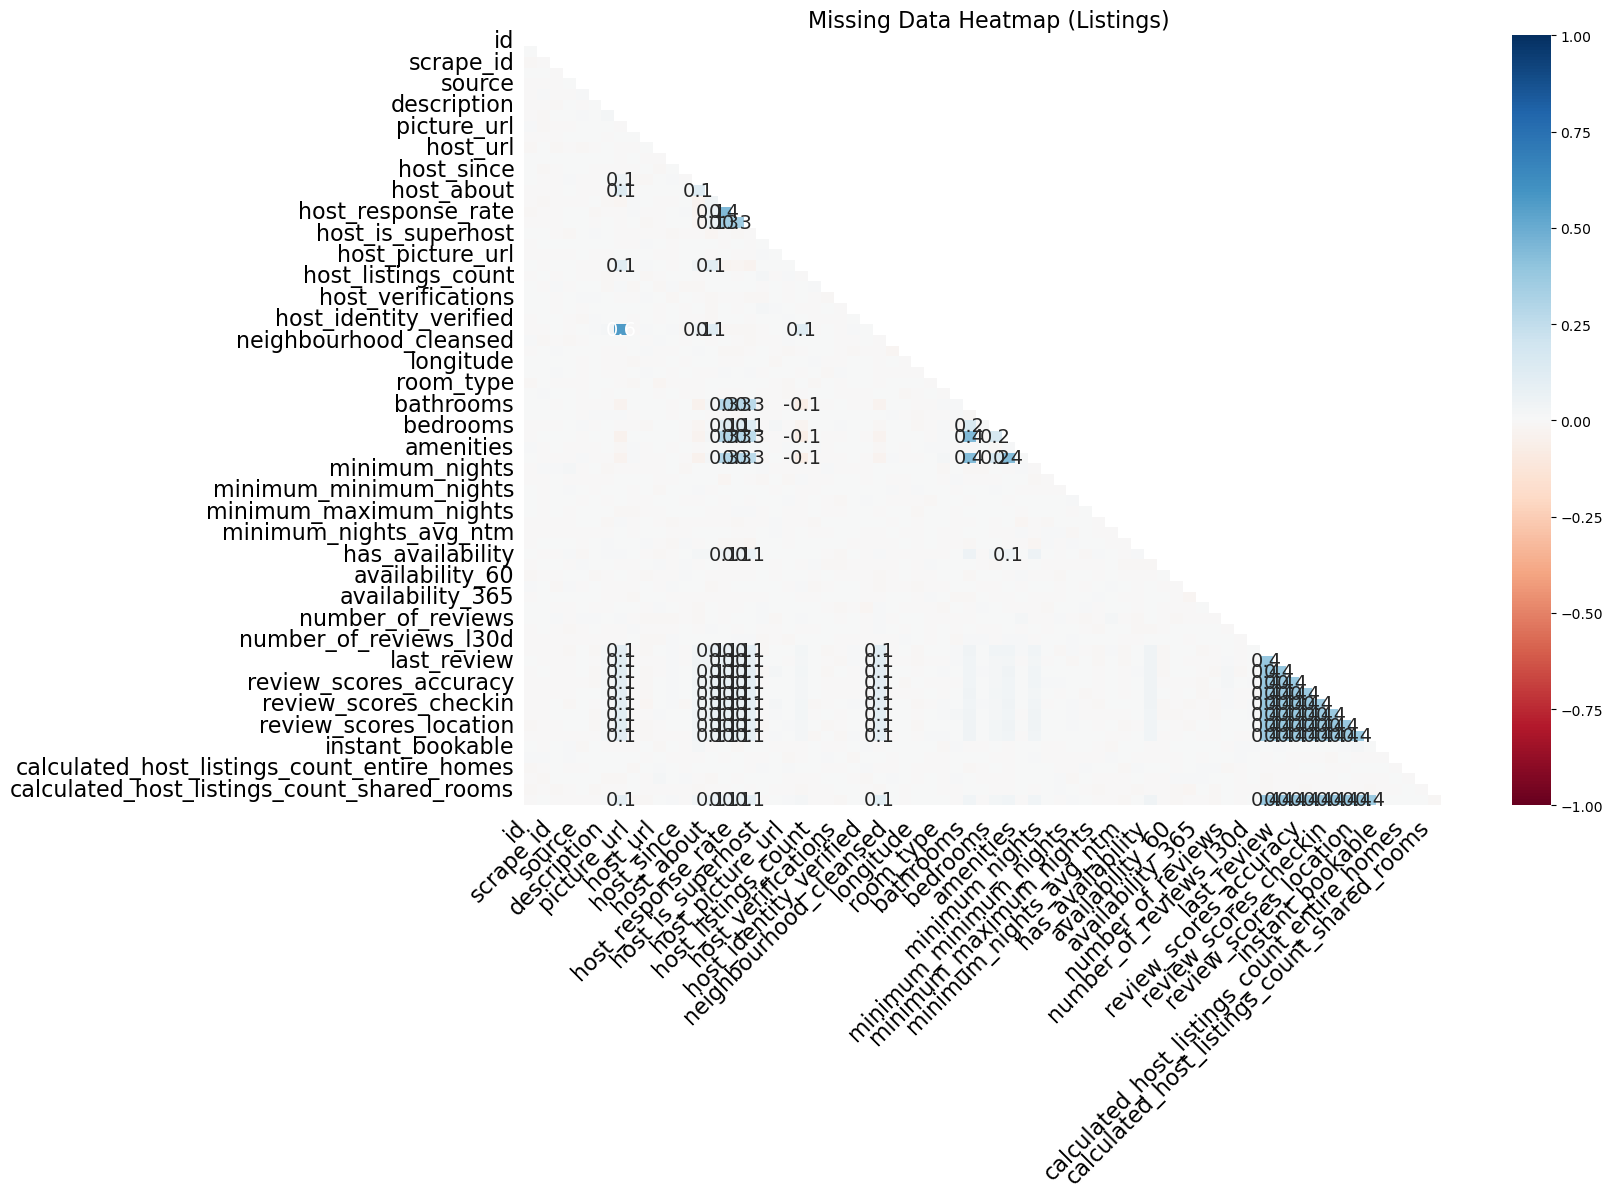


Missingness Matrix (Shows where data is missing):


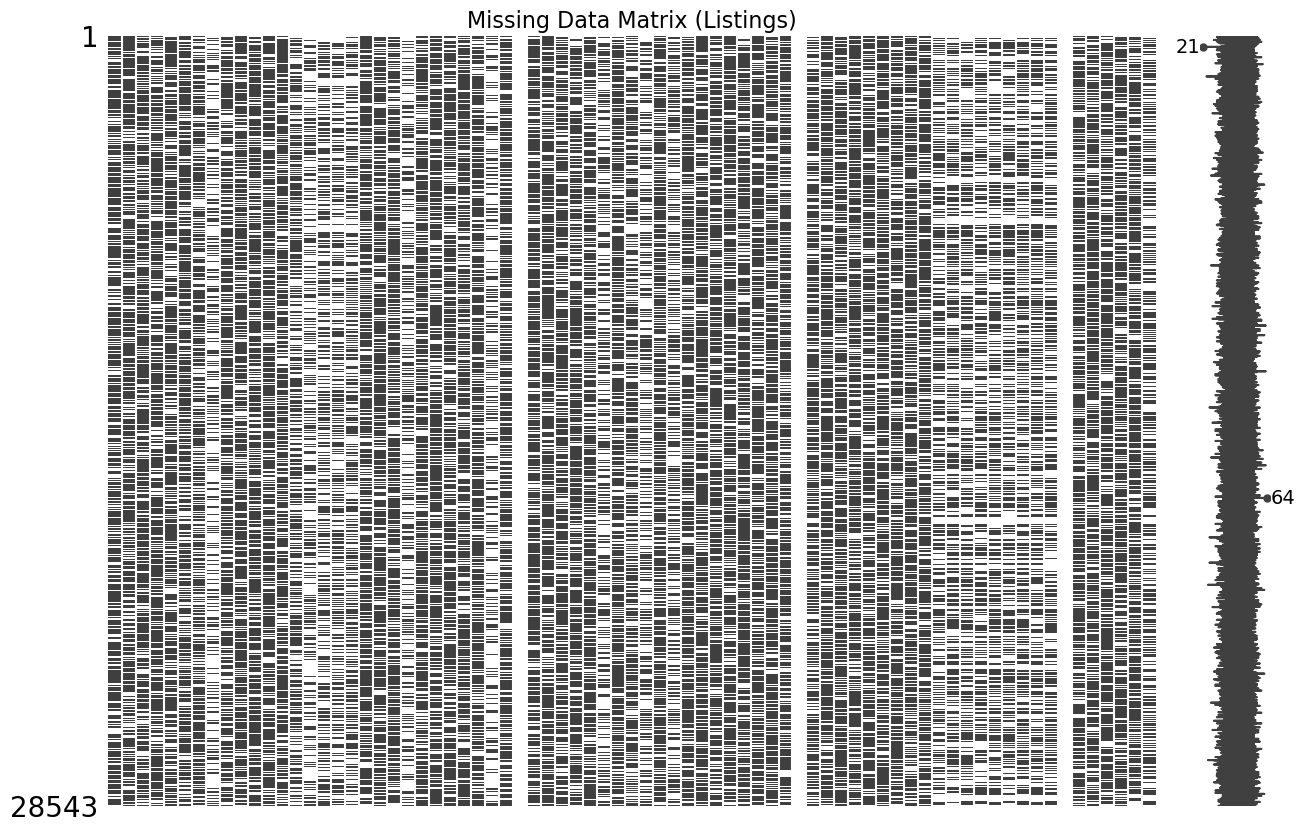

--- End Missing Data Visualization ---


In [23]:
!pip install missingno
import missingno as msno

print("\n--- Visualizing Missing Data: Listings ---")


if 'df_listings' in locals():


    print("\nMissingness Heatmap (Shows correlation of nullity):")
    msno.heatmap(df_listings, figsize=(15, 10))
    plt.title('Missing Data Heatmap (Listings)', fontsize=16)
    plt.show()


    print("\nMissingness Matrix (Shows where data is missing):")
    msno.matrix(df_listings, figsize=(15, 10))
    plt.title('Missing Data Matrix (Listings)', fontsize=16)
    plt.show()
else:
    print("df_listings not found. Please run previous cells.")

print("--- End Missing Data Visualization ---")


--- Visualizing Missing Data: Listings (Focused Subset) ---
Visualizing missingness for 28 selected columns.

Missingness Heatmap (Subset - Shows correlation of nullity):


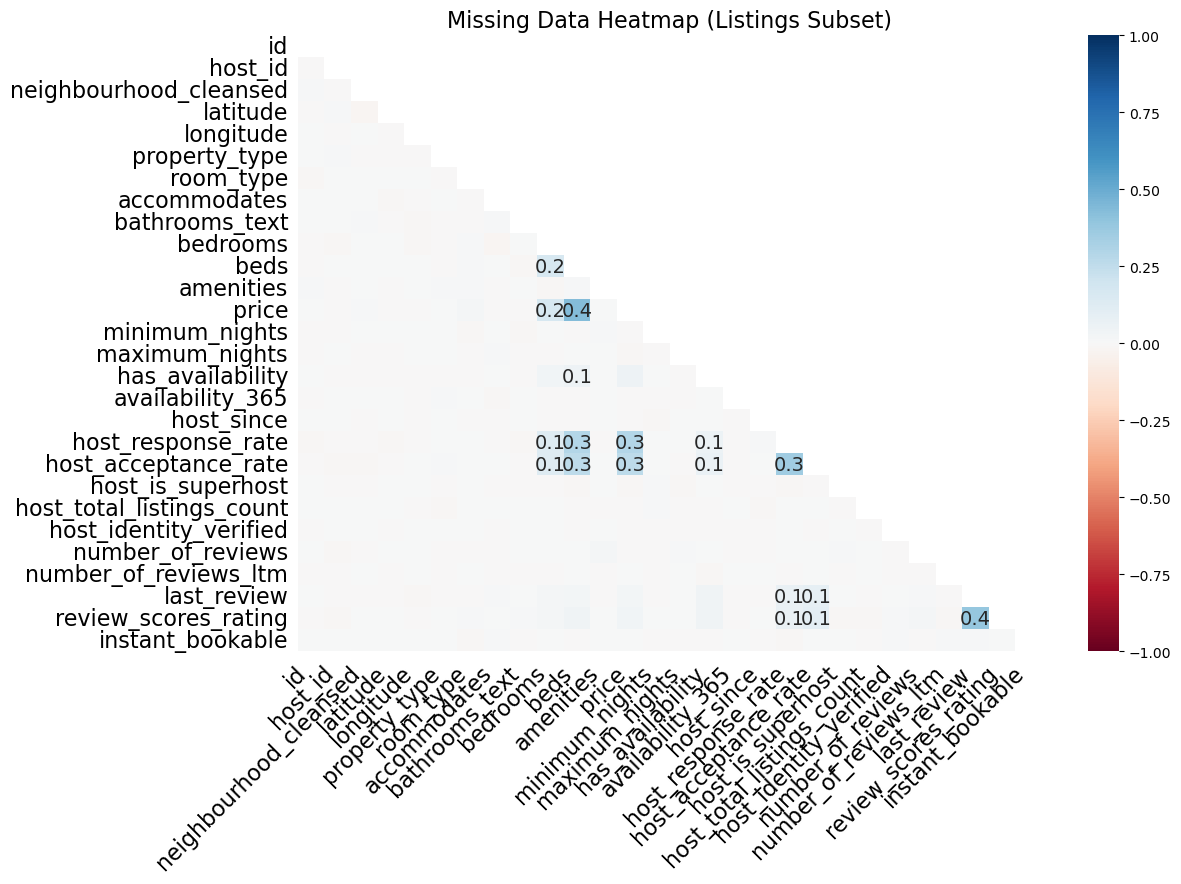


Missingness Matrix (Subset - Shows where data is missing):


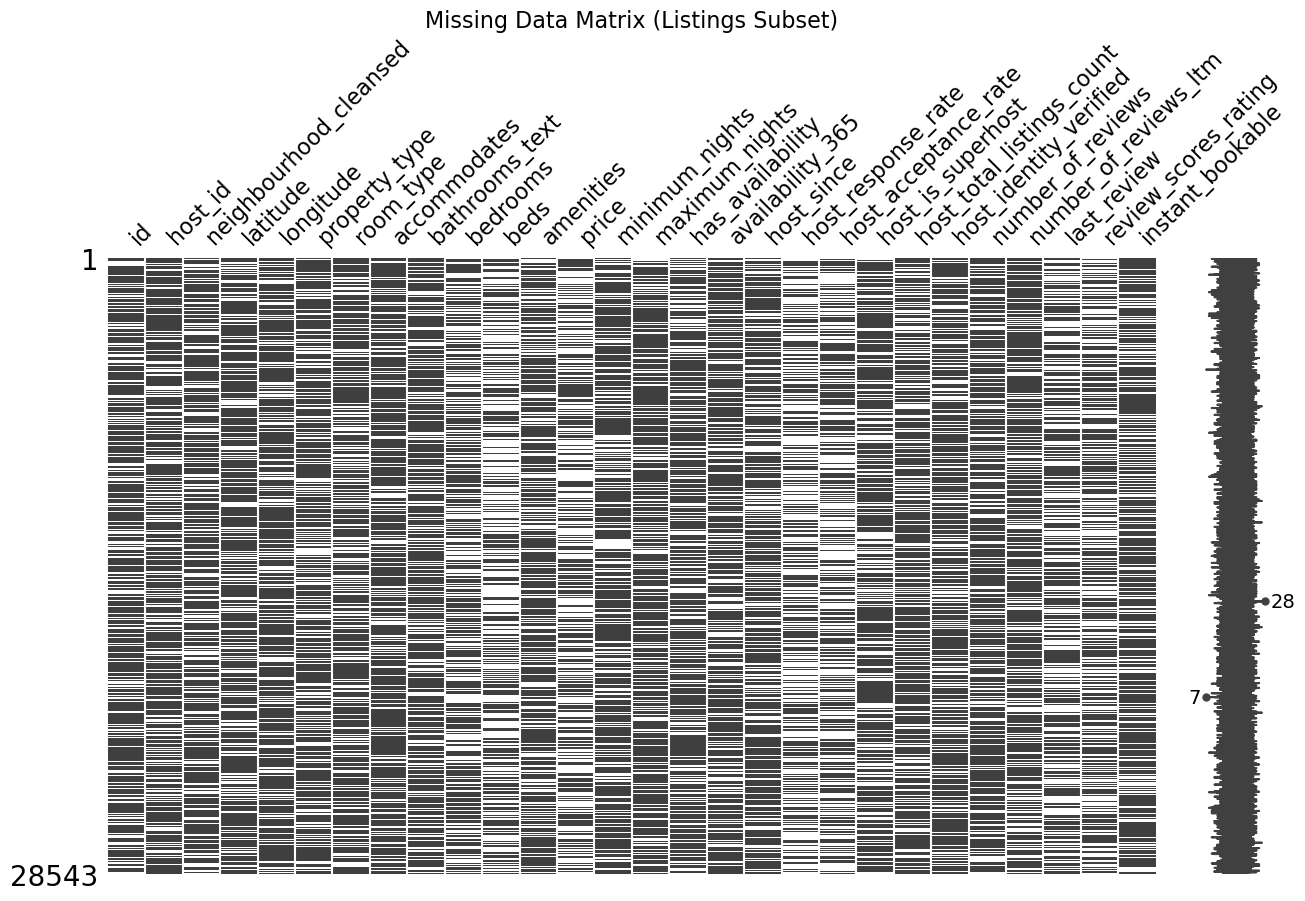

--- End Missing Data Visualization (Subset) ---


In [24]:


import missingno as msno

print("\n--- Visualizing Missing Data: Listings (Focused Subset) ---")


relevant_columns = [
    'id', 'host_id', 'neighbourhood_cleansed', 'latitude', 'longitude',
    'property_type', 'room_type', 'accommodates', 'bathrooms_text',
    'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
    'maximum_nights', 'has_availability', 'availability_365', 'host_since',
    'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
    'host_total_listings_count', 'host_identity_verified', 'number_of_reviews',
    'number_of_reviews_ltm', 'last_review', 'review_scores_rating',
    'instant_bookable'
]


if 'df_listings' in locals():

    df_listings_subset = df_listings[relevant_columns]

    print(f"Visualizing missingness for {len(relevant_columns)} selected columns.")


    print("\nMissingness Heatmap (Subset - Shows correlation of nullity):")
    msno.heatmap(df_listings_subset, figsize=(12, 8))
    plt.title('Missing Data Heatmap (Listings Subset)', fontsize=16)
    plt.show()


    print("\nMissingness Matrix (Subset - Shows where data is missing):")
    msno.matrix(df_listings_subset, figsize=(15, 8))
    plt.title('Missing Data Matrix (Listings Subset)', fontsize=16)
    plt.show()
else:
    print("df_listings not found. Please run previous cells.")

print("--- End Missing Data Visualization (Subset) ---")


--- Visualizing Missing Data: Listings (Sorted Sample & Improved Bar Chart) ---
Plotting matrix for the first 1000 rows sorted by 'review_scores_rating':


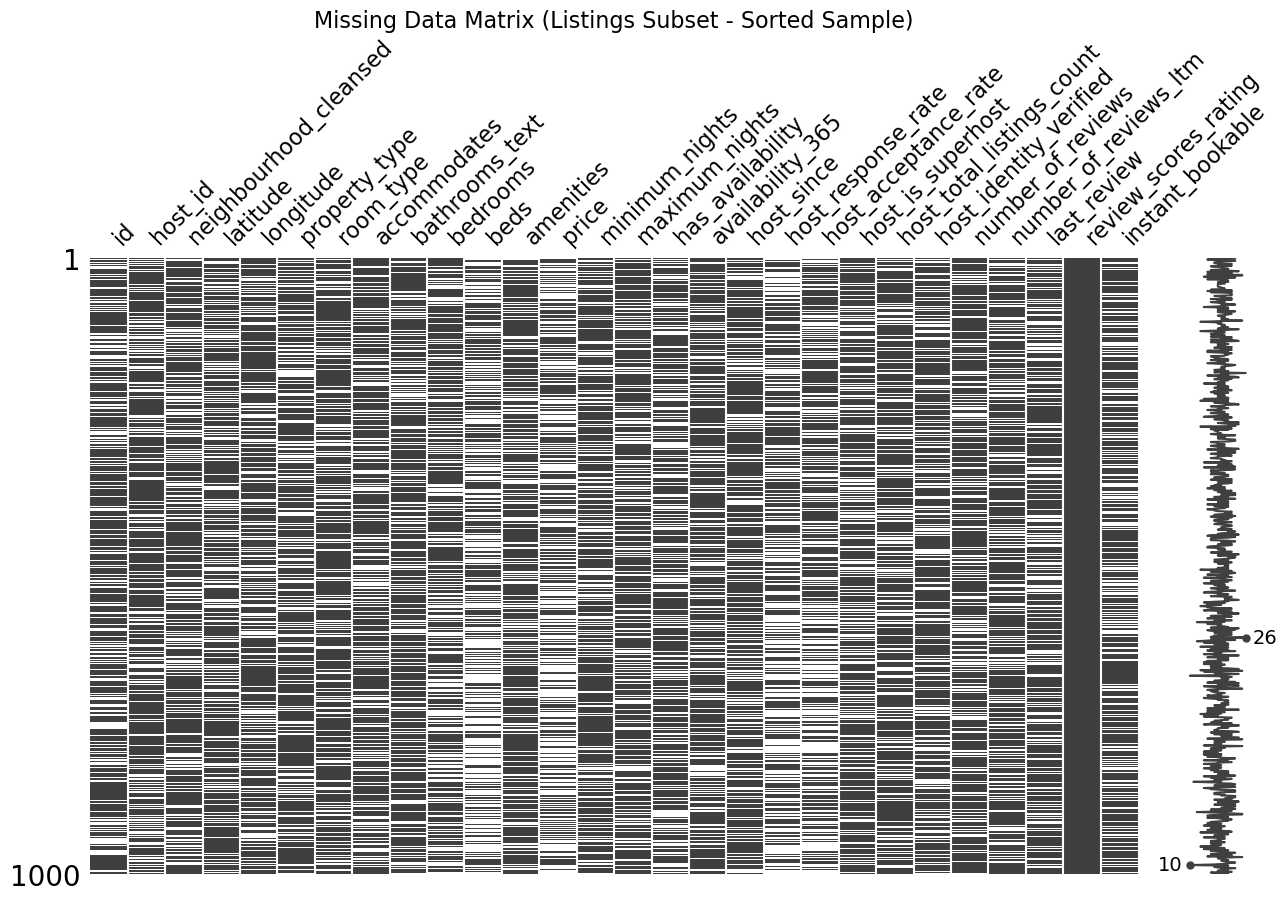


Missingness Bar Chart (Subset - Sorted by Completeness):


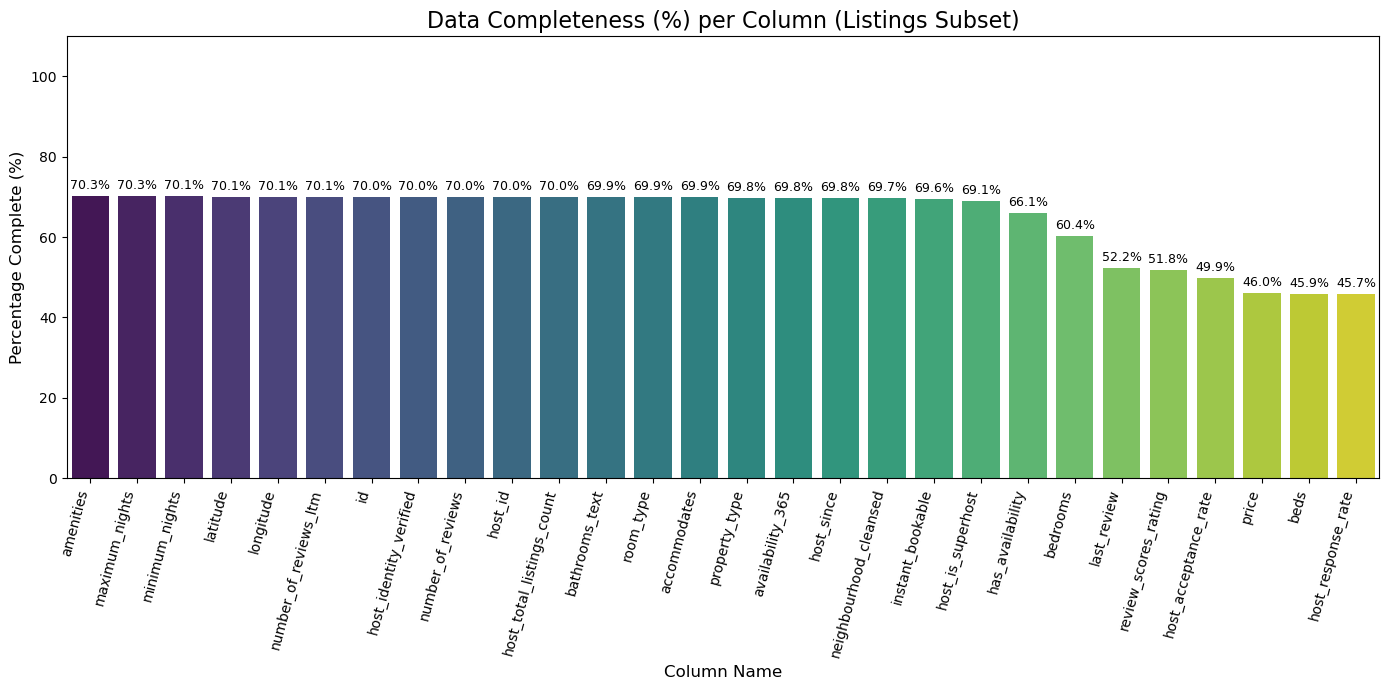

--- End Missing Data Visualization (Sorted Sample & Improved Bar Chart) ---


In [ ]:


import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Visualizing Missing Data: Listings (Sorted Sample & Improved Bar Chart) ---")


if 'df_listings_subset' in locals():


    df_sorted_sample = df_listings_subset.sort_values('review_scores_rating').head(1000)

    print("Plotting matrix for the first 1000 rows sorted by 'review_scores_rating':")
    msno.matrix(df_sorted_sample, figsize=(15, 8))
    plt.title('Missing Data Matrix (Listings Subset - Sorted Sample)', fontsize=16)
    plt.show()


    print("\nMissingness Bar Chart (Subset - Sorted by Completeness):")


    completeness = (df_listings_subset.notnull().sum() / len(df_listings_subset)) * 100
    completeness = completeness.sort_values(ascending=False)

    plt.figure(figsize=(14, 7))
    sns.barplot(x=completeness.index, y=completeness.values, palette='viridis')


    for index, value in enumerate(completeness.values):
        plt.text(index, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=9)

    plt.title('Data Completeness (%) per Column (Listings Subset)', fontsize=16)
    plt.xlabel('Column Name', fontsize=12)
    plt.ylabel('Percentage Complete (%)', fontsize=12)
    plt.xticks(rotation=75, ha='right')
    plt.ylim(0, 110)
    plt.tight_layout()
    plt.show()

else:
    print("df_listings_subset not found. Please run the previous cell first.")

print("--- End Missing Data Visualization (Sorted Sample & Improved Bar Chart) ---")


--- Plotting: Distribution of Review Scores Rating ---


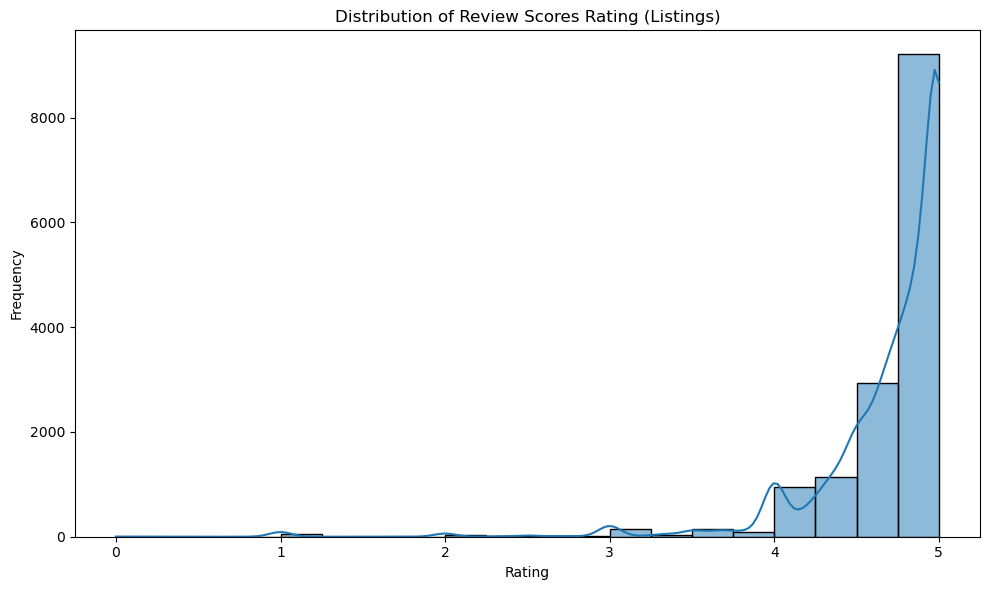

--- End Plotting: Review Scores Rating ---


In [27]:


print("\n--- Plotting: Distribution of Review Scores Rating ---")


if 'df_listings' in locals() and 'review_scores_rating' in df_listings.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_listings['review_scores_rating'].dropna(), kde=True, bins=20)
    plt.title('Distribution of Review Scores Rating (Listings)')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
else:
    print("df_listings or review_scores_rating column not found. Please run previous cells.")

print("--- End Plotting: Review Scores Rating ---")


--- Plotting: Distribution of Accommodates ---


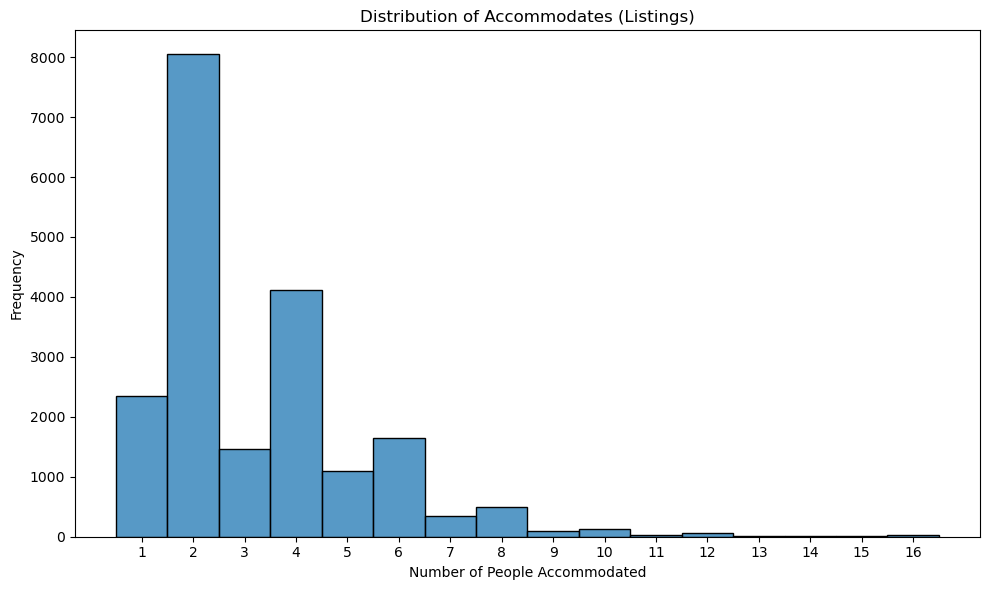

--- End Plotting: Accommodates ---


In [28]:


print("\n--- Plotting: Distribution of Accommodates ---")


if 'df_listings' in locals() and 'accommodates' in df_listings.columns:
    plt.figure(figsize=(10, 6))

    max_accom = int(df_listings['accommodates'].max())
    bins = range(1, max_accom + 2)
    sns.histplot(df_listings['accommodates'].dropna(), kde=False, bins=bins, discrete=True)
    plt.title('Distribution of Accommodates (Listings)')
    plt.xlabel('Number of People Accommodated')
    plt.ylabel('Frequency')
    plt.xticks(range(1, max_accom + 1))
    plt.tight_layout()
    plt.show()
else:
    print("df_listings or accommodates column not found. Please run previous cells.")

print("--- End Plotting: Accommodates ---")


--- Exploring: Calendar Availability ('t'/'f') ---


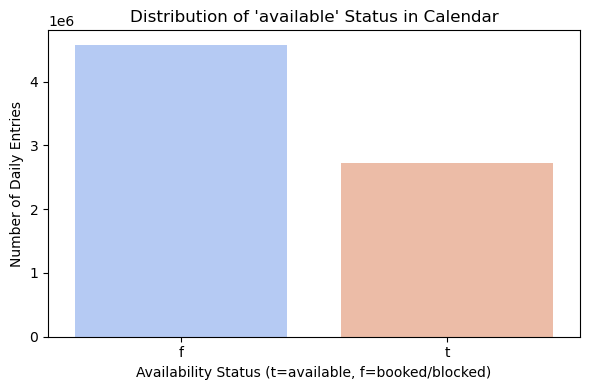

f      4575951
NaN    3124691
t      2717219
Name: available, dtype: int64
--- End Exploring: Calendar Availability ---


In [29]:


print("\n--- Exploring: Calendar Availability ('t'/'f') ---")

if 'df_calendar' in locals() and 'available' in df_calendar.columns:
    plt.figure(figsize=(6, 4))
    available_counts = df_calendar['available'].value_counts(dropna=False)
    sns.barplot(x=available_counts.index, y=available_counts.values, palette='coolwarm')
    plt.title('Distribution of \'available\' Status in Calendar')
    plt.xlabel('Availability Status (t=available, f=booked/blocked)')
    plt.ylabel('Number of Daily Entries')
    plt.tight_layout()
    plt.show()
    print(available_counts)
else:
    print("df_calendar or available column not found.")

print("--- End Exploring: Calendar Availability ---")


--- Exploring: Calendar History Length per Listing ---


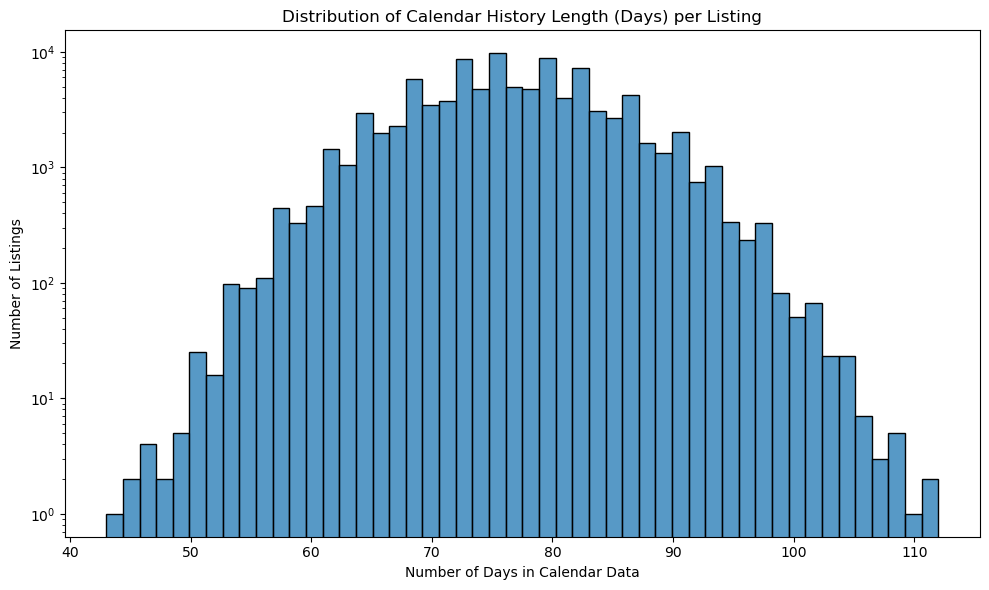


Descriptive statistics for history length:
count    95142.000000
mean        76.637184
std          7.776325
min         43.000000
25%         71.000000
50%         77.000000
75%         82.000000
max        112.000000
Name: listing_id, dtype: float64
--- End Exploring: Calendar History Length ---


In [30]:


print("\n--- Exploring: Calendar History Length per Listing ---")

if 'df_calendar' in locals() and 'listing_id' in df_calendar.columns:

    entries_per_listing = df_calendar.dropna(subset=['listing_id'])['listing_id'].value_counts()

    plt.figure(figsize=(10, 6))
    sns.histplot(entries_per_listing, bins=50, kde=False)
    plt.title('Distribution of Calendar History Length (Days) per Listing')
    plt.xlabel('Number of Days in Calendar Data')
    plt.ylabel('Number of Listings')
    plt.yscale('log')
    plt.tight_layout()
    plt.show()

    print("\nDescriptive statistics for history length:")
    print(entries_per_listing.describe())
else:
    print("df_calendar or listing_id column not found.")

print("--- End Exploring: Calendar History Length ---")


--- Exploring: Session Action Types ---


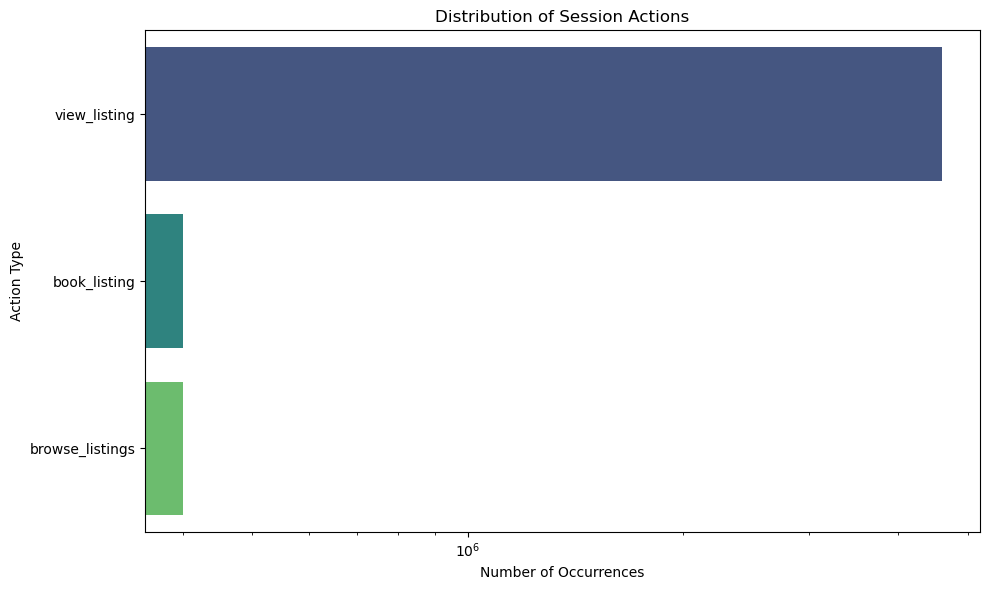


Top action counts:
view_listing       4605417
NaN                2318088
book_listing        400485
browse_listings     400204
Name: action, dtype: int64
--- End Exploring: Session Actions ---


In [31]:


print("\n--- Exploring: Session Action Types ---")

if 'df_sessions' in locals() and 'action' in df_sessions.columns:
    plt.figure(figsize=(10, 6))
    action_counts = df_sessions['action'].value_counts(dropna=False)


    top_n = 15
    if len(action_counts) > top_n:
        action_counts_top = action_counts.head(top_n)
        plot_title = f'Distribution of Session Actions (Top {top_n})'
    else:
        action_counts_top = action_counts
        plot_title = 'Distribution of Session Actions'

    sns.barplot(y=action_counts_top.index, x=action_counts_top.values, palette='viridis', orient='h')
    plt.title(plot_title)
    plt.xlabel('Number of Occurrences')
    plt.ylabel('Action Type')
    plt.xscale('log')
    plt.tight_layout()
    plt.show()
    print("\nTop action counts:")
    print(action_counts.head(top_n))
else:
    print("df_sessions or action column not found.")

print("--- End Exploring: Session Actions ---")

In [32]:


print("\n--- Exploring: Listing ID Overlap (Calendar vs Listings) ---")

if 'df_calendar' in locals() and 'df_listings' in locals() and 'listing_id' in df_calendar.columns and 'id' in df_listings.columns:

    calendar_ids = df_calendar['listing_id'].dropna().unique()
    listings_ids = df_listings['id'].dropna().unique()

    print(f"Unique non-null listing_ids in Calendar: {len(calendar_ids)}")
    print(f"Unique non-null ids in Listings: {len(listings_ids)}")



    try:

        calendar_ids_float = pd.to_numeric(calendar_ids, errors='coerce')
        listings_ids_float = pd.to_numeric(listings_ids, errors='coerce')


        calendar_ids_float = calendar_ids_float[~np.isnan(calendar_ids_float)]
        listings_ids_float = listings_ids_float[~np.isnan(listings_ids_float)]


        set_calendar_ids = set(calendar_ids_float)
        set_listings_ids = set(listings_ids_float)

        overlap_count = len(set_calendar_ids.intersection(set_listings_ids))
        calendar_only_count = len(set_calendar_ids - set_listings_ids)
        listings_only_count = len(set_listings_ids - set_calendar_ids)

        print(f"\nNumber of Calendar listing_ids found in Listings: {overlap_count}")
        print(f"Number of Calendar listing_ids NOT found in Listings: {calendar_only_count}")
        print(f"Number of Listings ids NOT found in Calendar: {listings_only_count}")
    except Exception as e:
        print(f"Could not perform overlap check, potentially due to ID type issues: {e}")

else:
    print("Required DataFrames (df_calendar, df_listings) or columns (listing_id, id) not found.")

print("--- End Exploring: Listing ID Overlap ---")


--- Exploring: Listing ID Overlap (Calendar vs Listings) ---
Unique non-null listing_ids in Calendar: 95142
Unique non-null ids in Listings: 19994

Number of Calendar listing_ids found in Listings: 19994
Number of Calendar listing_ids NOT found in Listings: 75148
Number of Listings ids NOT found in Calendar: 0
--- End Exploring: Listing ID Overlap ---



--- Exploring: Common Amenities ---
Found 3645 unique amenities.


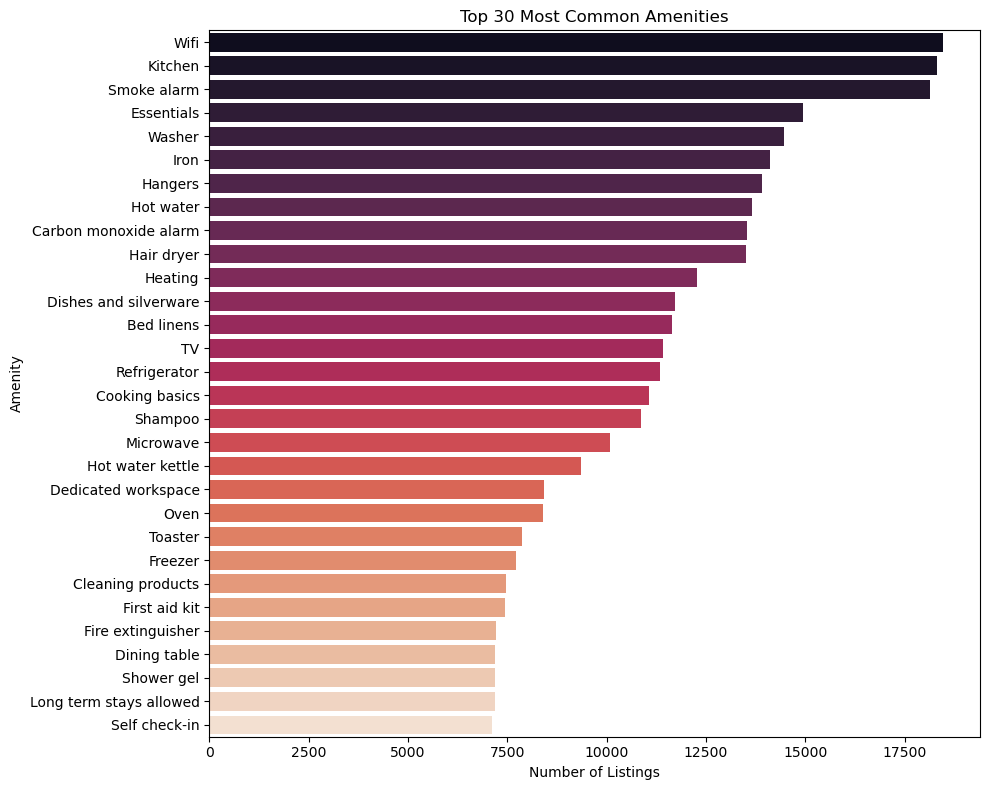


Top common amenities counts:
                    Amenity  Count
0                      Wifi  18471
1                   Kitchen  18304
2               Smoke alarm  18130
3                Essentials  14931
4                    Washer  14474
5                      Iron  14114
6                   Hangers  13913
7                 Hot water  13663
8     Carbon monoxide alarm  13539
9                Hair dryer  13495
10                  Heating  12283
11    Dishes and silverware  11724
12               Bed linens  11633
13                       TV  11408
14             Refrigerator  11352
15           Cooking basics  11062
16                  Shampoo  10861
17                Microwave  10087
18         Hot water kettle   9357
19      Dedicated workspace   8422
20                     Oven   8400
21                  Toaster   7876
22                  Freezer   7729
23        Cleaning products   7470
24            First aid kit   7437
25        Fire extinguisher   7206
26             Dining tab

In [33]:

import ast
from collections import Counter

print("\n--- Exploring: Common Amenities ---")

if 'df_listings' in locals() and 'amenities' in df_listings.columns:


    amenities_series = df_listings['amenities'].dropna()

    all_amenities = Counter()

    for item in amenities_series:
        try:


            list_of_amenities = ast.literal_eval(item)
            if isinstance(list_of_amenities, list):

                cleaned_amenities = [amenity.strip('"') for amenity in list_of_amenities]
                all_amenities.update(cleaned_amenities)
        except (ValueError, SyntaxError):


            pass

    print(f"Found {len(all_amenities)} unique amenities.")


    top_n = 30
    common_amenities = all_amenities.most_common(top_n)

    if common_amenities:
        plt.figure(figsize=(10, 8))
        df_common_amenities = pd.DataFrame(common_amenities, columns=['Amenity', 'Count'])
        sns.barplot(y='Amenity', x='Count', data=df_common_amenities, palette='rocket', orient='h')
        plt.title(f'Top {top_n} Most Common Amenities')
        plt.xlabel('Number of Listings')
        plt.ylabel('Amenity')
        plt.tight_layout()
        plt.show()
        print("\nTop common amenities counts:")
        print(df_common_amenities)
    else:
        print("No common amenities found or parsing failed.")

else:
    print("df_listings or amenities column not found.")

print("--- End Exploring: Common Amenities ---")